In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_csv('titanic-train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analysing the Data

In [4]:
print("Total Number of Passengers are {}".format(len(dataset.index)))

Total Number of Passengers are 891


<AxesSubplot:xlabel='Survived', ylabel='count'>

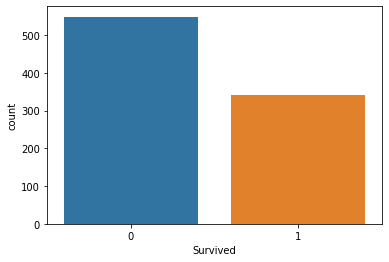

In [5]:
sns.countplot(dataset['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

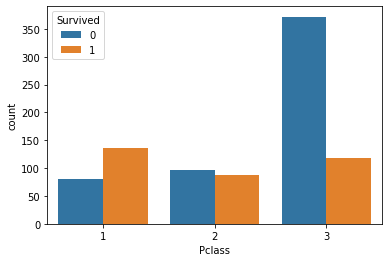

In [6]:
sns.countplot(dataset['Pclass'],hue=dataset.Survived)

<AxesSubplot:xlabel='Sex', ylabel='count'>

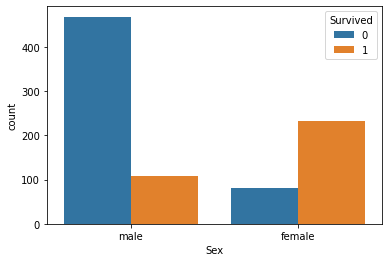

In [7]:
sns.countplot(x='Sex',hue='Survived',data=dataset)

<AxesSubplot:ylabel='Frequency'>

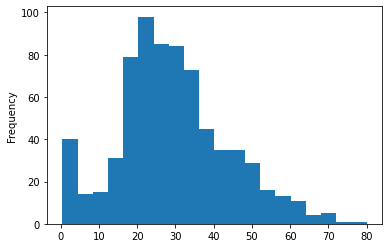

In [8]:
#sns.distplot(dataset['Age'],kde=False,bins=20)
dataset['Age'].plot.hist(bins=20)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

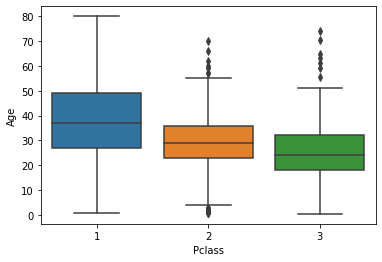

In [9]:
sns.boxplot(x=dataset.Pclass,y=dataset.Age)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

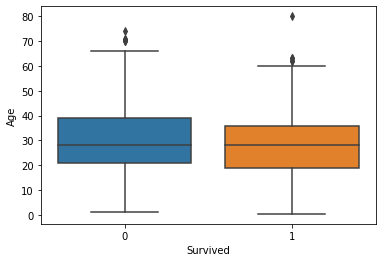

In [10]:
sns.boxplot(x=dataset.Survived,y=dataset.Age)

<AxesSubplot:ylabel='Frequency'>

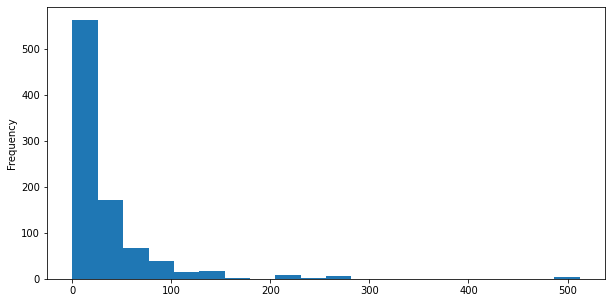

In [11]:
dataset['Fare'].plot.hist(bins=20,figsize=(10,5))


<AxesSubplot:xlabel='SibSp', ylabel='count'>

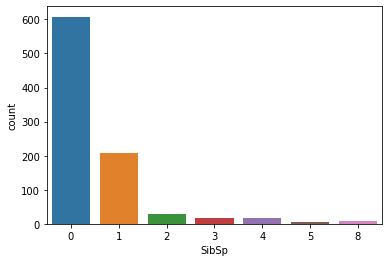

In [12]:
sns.countplot(dataset.SibSp)

<AxesSubplot:xlabel='Parch', ylabel='count'>

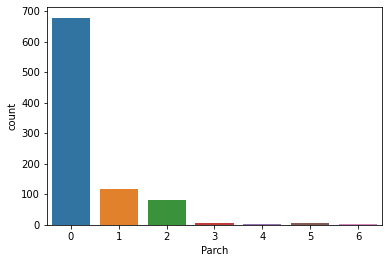

In [13]:
sns.countplot(dataset.Parch)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

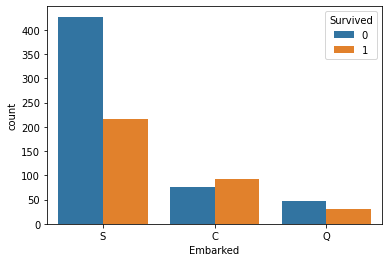

In [14]:
sns.countplot(x=dataset['Embarked'],hue=dataset['Survived'])

## Data Cleaning

In [15]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

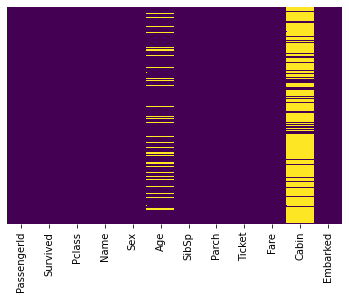

In [16]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
def impute_nan(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age) :
        if Pclass == 1 :
            return 37
        elif Pclass == 2 :
            return 29
        else :
            return 24
    else :
        return Age
        
        

In [18]:
## Missing value imputation
dataset['Age']=dataset[['Age','Pclass']].apply(impute_nan,axis=1)


In [19]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
to_del=dataset[dataset['Embarked'].isnull()].index.tolist()

In [21]:
to_del

[61, 829]

In [22]:
dataset.drop(to_del,inplace=True)

In [23]:
### here we just drop the feature cabin
dataset.drop(['Cabin','Name','PassengerId','Ticket'],inplace=True,axis=1)

In [24]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Handling Categorical

In [25]:
Sex=pd.get_dummies(dataset['Sex'],drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [26]:
dataset.drop(['Sex','Embarked'],axis=1,inplace=True)

In [29]:
dataset=pd.concat([dataset,Sex],axis=1)

# Final dataset for training

In [30]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [31]:
X=dataset.drop('Survived',axis=1)
y=dataset['Survived']

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(X)
#data=pd.DataFrame(data_scaled,columns=dataset.columns)
#data.head()

In [34]:
data_scaled

array([[ 0.82520863, -0.53167023,  0.43135024, -0.47432585, -0.50023975,
         0.73534203],
       [-1.57221121,  0.68023223,  0.43135024, -0.47432585,  0.78894661,
        -1.35991138],
       [ 0.82520863, -0.22869462, -0.47519908, -0.47432585, -0.48664993,
        -1.35991138],
       ...,
       [ 0.82520863, -0.38018243,  0.43135024,  2.00611934, -0.17408416,
        -1.35991138],
       [-1.57221121, -0.22869462, -0.47519908, -0.47432585, -0.0422126 ,
         0.73534203],
       [ 0.82520863,  0.22576881, -0.47519908, -0.47432585, -0.49017322,
         0.73534203]])

In [35]:
## Finding the 1s and 0s count
dataset.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data_scaled,y,test_size=.3,random_state=101)

In [37]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (622, 6)
y_train:  (622,)
X_test:  (267, 6)
y_test:  (267,)


In [39]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
print("Accuracy of training data",accuracy_score(y_train,dec_tree.predict(X_train)))

Accuracy of trainind data 0.9887459807073955


In [45]:
print("Accuracy of test data",accuracy_score(y_test,dec_tree.predict(X_test)))

Accuracy of test data 0.7602996254681648


### The tree formed for the dataset

[Text(402.4533482142857, 529.2947368421053, 'X[5] <= -0.312\ngini = 0.471\nsamples = 622\nvalue = [386, 236]'),
 Text(179.025, 500.68421052631584, 'X[0] <= 0.226\ngini = 0.396\nsamples = 224\nvalue = [61, 163]'),
 Text(95.65714285714286, 472.0736842105263, 'X[1] <= -2.009\ngini = 0.138\nsamples = 121\nvalue = [9, 112]'),
 Text(69.08571428571429, 443.46315789473687, 'X[4] <= 1.141\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(58.457142857142856, 414.85263157894735, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(79.71428571428571, 414.85263157894735, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(122.22857142857143, 443.46315789473687, 'X[4] <= -0.055\ngini = 0.125\nsamples = 119\nvalue = [8, 111]'),
 Text(100.97142857142856, 414.85263157894735, 'X[4] <= -0.078\ngini = 0.241\nsamples = 50\nvalue = [7, 43]'),
 Text(90.34285714285714, 386.2421052631579, 'X[1] <= 2.044\ngini = 0.215\nsamples = 49\nvalue = [6, 43]'),
 Text(63.77142857142857, 357.63157894736844, 'X[1] <= -0.115\ngin

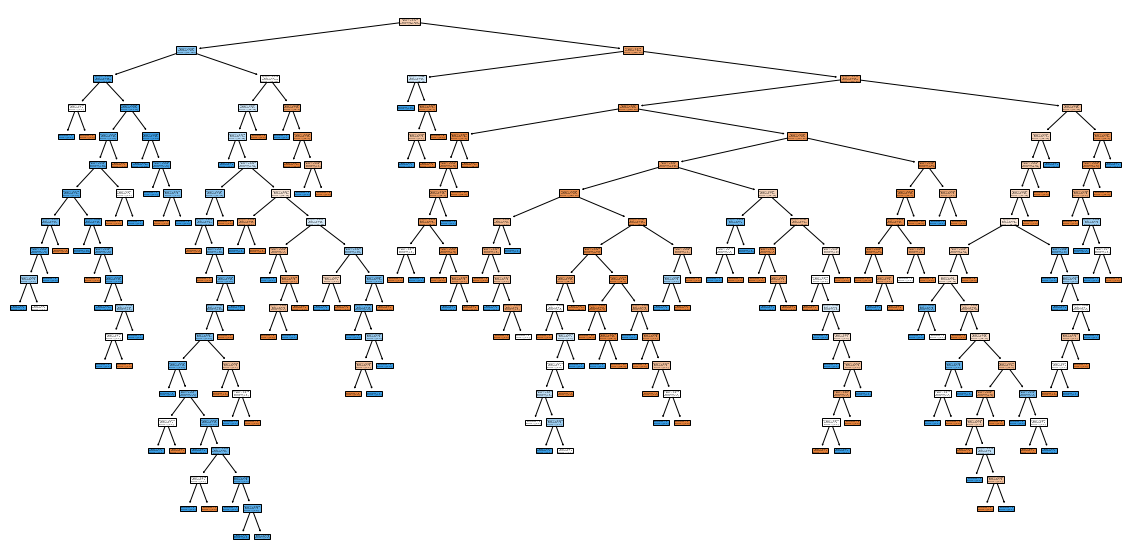

In [48]:
plt.figure(figsize=(20,10))
from sklearn import tree
tree.plot_tree(dec_tree,filled=True)

### Our model is an overfitted one
Lets see the classification report of the model

In [41]:
print(classification_report(y_test,dec_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       163
           1       0.69      0.70      0.70       104

    accuracy                           0.76       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.76      0.76      0.76       267



### Hypertuning the parameters for overcome overfitting scenario

In [49]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,5,1),
    'min_samples_split': range(2,5,1),
    'splitter' : ['best', 'random']
    
}

In [52]:
from sklearn.model_selection import GridSearchCV
dec_tree1=DecisionTreeClassifier()
grid_search=GridSearchCV(dec_tree1,param_grid=grid_param,cv=5,n_jobs=4)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [53]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'splitter': 'best'}

In [54]:
dec_tree1=DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 7,
 min_samples_leaf= 1,
 min_samples_split= 4,
 splitter= 'best')

In [55]:
dec_tree1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
print("Training Score is ",dec_tree1.score(X_train,y_train))

Training Score is  0.8745980707395499


In [57]:
print("Testing Score is ",dec_tree1.score(X_test,y_test))

Testing Score is  0.8164794007490637


## Tree formed after hyper tuning

[Text(517.4181818181818, 509.625, 'X[5] <= -0.312\nentropy = 0.958\nsamples = 622\nvalue = [386, 236]'),
 Text(268.8545454545454, 441.675, 'X[0] <= 0.226\nentropy = 0.845\nsamples = 224\nvalue = [61, 163]'),
 Text(121.74545454545454, 373.725, 'X[4] <= -0.055\nentropy = 0.382\nsamples = 121\nvalue = [9, 112]'),
 Text(81.16363636363636, 305.775, 'X[4] <= -0.078\nentropy = 0.577\nsamples = 51\nvalue = [7, 44]'),
 Text(60.87272727272727, 237.825, 'X[1] <= -0.418\nentropy = 0.529\nsamples = 50\nvalue = [6, 44]'),
 Text(40.58181818181818, 169.875, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(81.16363636363636, 169.875, 'X[1] <= -0.115\nentropy = 0.583\nsamples = 43\nvalue = [6, 37]'),
 Text(40.58181818181818, 101.92500000000001, 'X[1] <= -0.267\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(20.29090909090909, 33.97500000000002, 'entropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(60.87272727272727, 33.97500000000002, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(121.7

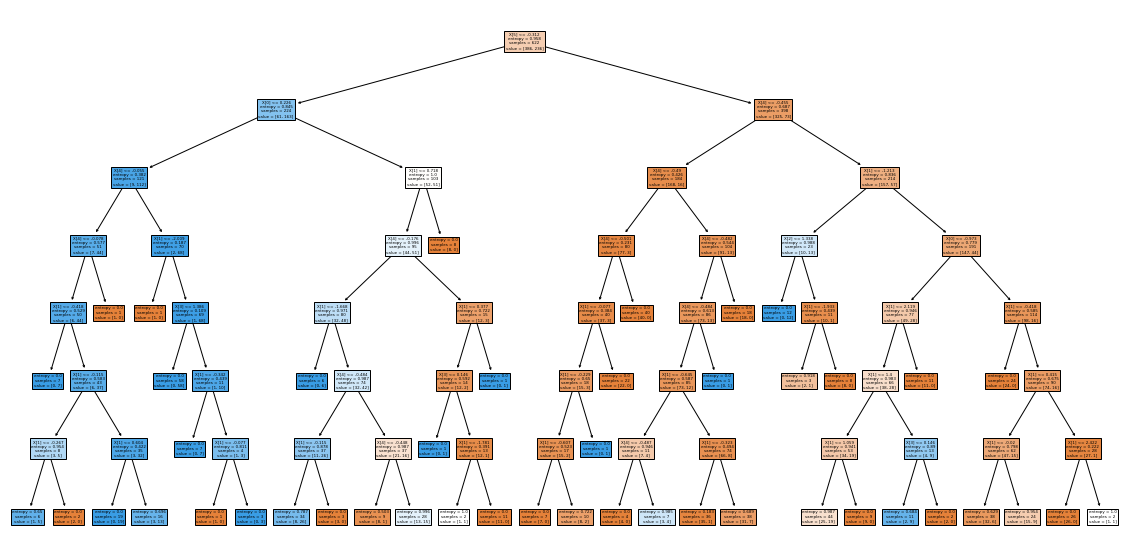

In [64]:
plt.figure(figsize=(20,10))
from sklearn import tree
tree.plot_tree(dec_tree1,filled=True)

#### Here we can see that our model efficiency has improved a lot with hyper tuning the model

### Lets see the model accuracy with cross validation

In [63]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dec_tree1,X,y,cv=10,scoring='accuracy', n_jobs=4)
print("The cross validation score with hyper tuned decision tree classifier is ",scores.mean())

The cross validation score with hyper tuned decision tree classifier is  0.8245275791624106


In [88]:
y_pred = dec_tree1.predict(X_test)
print("ROC_AUC score ", roc_auc_score(y_pred,y_test))
print("*********************************************")
print("confusion_matrix for hyper tuned tree")
print(confusion_matrix(y_test,y_pred))

ROC_AUC score  0.8183581124757595
*********************************************
confusion_matrix for hyper tuned tree
[[148  15]
 [ 34  70]]


### Lets do post pruning method also to improve the model accuracy

In [67]:
path=dec_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas,impuriies=path.ccp_alphas, path.impurities

In [68]:
ccp_alphas

array([0.00000000e+00, 7.65579544e-05, 1.02077272e-04, 3.21543408e-04,
       5.35905681e-04, 8.03858521e-04, 9.08709632e-04, 9.37834941e-04,
       9.64630225e-04, 9.89364333e-04, 1.05232388e-03, 1.05627786e-03,
       1.07181136e-03, 1.07181136e-03, 1.20172789e-03, 1.20578778e-03,
       1.20578778e-03, 1.21471954e-03, 1.25694241e-03, 1.27155802e-03,
       1.28617363e-03, 1.28617363e-03, 1.32636656e-03, 1.33976420e-03,
       1.33976420e-03, 1.42908181e-03, 1.45812946e-03, 1.46156095e-03,
       1.53651279e-03, 1.58569352e-03, 1.60771704e-03, 1.60771704e-03,
       1.65424844e-03, 1.75062522e-03, 1.78635227e-03, 1.79528403e-03,
       1.87566988e-03, 1.87729384e-03, 1.90225976e-03, 1.91394886e-03,
       1.92926045e-03, 1.98954984e-03, 1.99782485e-03, 2.04698470e-03,
       2.06117569e-03, 2.59378349e-03, 2.59778806e-03, 2.70773397e-03,
       2.92765509e-03, 3.15737763e-03, 3.50125045e-03, 4.15732892e-03,
       4.21723214e-03, 4.55867819e-03, 4.73494708e-03, 5.58194705e-03,
      

In [69]:
scores_train=[]
scores_test=[]
for i in ccp_alphas :
    clf=DecisionTreeClassifier(ccp_alpha=i,random_state=0)
    clf.fit(X_train,y_train)
    scores_train.append(clf.score(X_train,y_train))
    scores_test.append(clf.score(X_test,y_test))
    print("Accuracy for TRAIN data for alpha value : {} is : {}".format(i,clf.score(X_train,y_train)))
    print("Accuracy for TEST data for alpha value : {} is : {}".format(i,clf.score(X_test,y_test)))
 

Accuracy for TRAIN data for alpha value : 0.0 is : 0.9887459807073955
Accuracy for TEST data for alpha value : 0.0 is : 0.7602996254681648
Accuracy for TRAIN data for alpha value : 7.655795437146e-05 is : 0.9887459807073955
Accuracy for TEST data for alpha value : 7.655795437146e-05 is : 0.7602996254681648
Accuracy for TRAIN data for alpha value : 0.00010207727249527798 is : 0.9887459807073955
Accuracy for TEST data for alpha value : 0.00010207727249527798 is : 0.7602996254681648
Accuracy for TRAIN data for alpha value : 0.00032154340836012857 is : 0.9887459807073955
Accuracy for TEST data for alpha value : 0.00032154340836012857 is : 0.7565543071161048
Accuracy for TRAIN data for alpha value : 0.0005359056806002144 is : 0.9887459807073955
Accuracy for TEST data for alpha value : 0.0005359056806002144 is : 0.7602996254681648
Accuracy for TRAIN data for alpha value : 0.0008038585209003218 is : 0.9887459807073955
Accuracy for TEST data for alpha value : 0.0008038585209003218 is : 0.76029

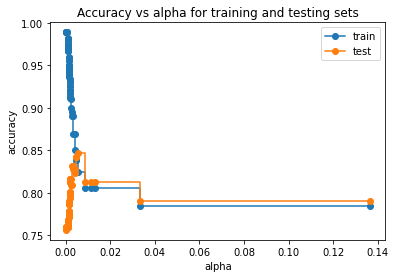

In [70]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, scores_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, scores_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [71]:
clf_tree=DecisionTreeClassifier(ccp_alpha=0.0042172321409332195,random_state=1)
clf_tree.fit(X_train,y_train)
print("Training score ",clf_tree.score(X_train,y_train)),print("Testing score",clf_tree.score(X_test,y_test))

Training score  0.8504823151125402
Testing score 0.8239700374531835


(None, None)

[Text(328.82142857142856, 513.4, 'X[5] <= -0.312\ngini = 0.471\nsamples = 622\nvalue = [386, 236]'),
 Text(119.57142857142857, 453.0, 'X[0] <= 0.226\ngini = 0.396\nsamples = 224\nvalue = [61, 163]'),
 Text(59.785714285714285, 392.6, 'gini = 0.138\nsamples = 121\nvalue = [9, 112]'),
 Text(179.35714285714286, 392.6, 'X[4] <= -0.176\ngini = 0.5\nsamples = 103\nvalue = [52, 51]'),
 Text(119.57142857142857, 332.2, 'X[1] <= 0.567\ngini = 0.49\nsamples = 84\nvalue = [36, 48]'),
 Text(59.785714285714285, 271.8, 'gini = 0.477\nsamples = 79\nvalue = [31, 48]'),
 Text(179.35714285714286, 271.8, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(239.14285714285714, 332.2, 'gini = 0.266\nsamples = 19\nvalue = [16, 3]'),
 Text(538.0714285714286, 453.0, 'X[1] <= -1.213\ngini = 0.3\nsamples = 398\nvalue = [325, 73]'),
 Text(418.5, 392.6, 'X[2] <= 1.338\ngini = 0.491\nsamples = 23\nvalue = [10, 13]'),
 Text(358.7142857142857, 332.2, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(478.2857142857143, 

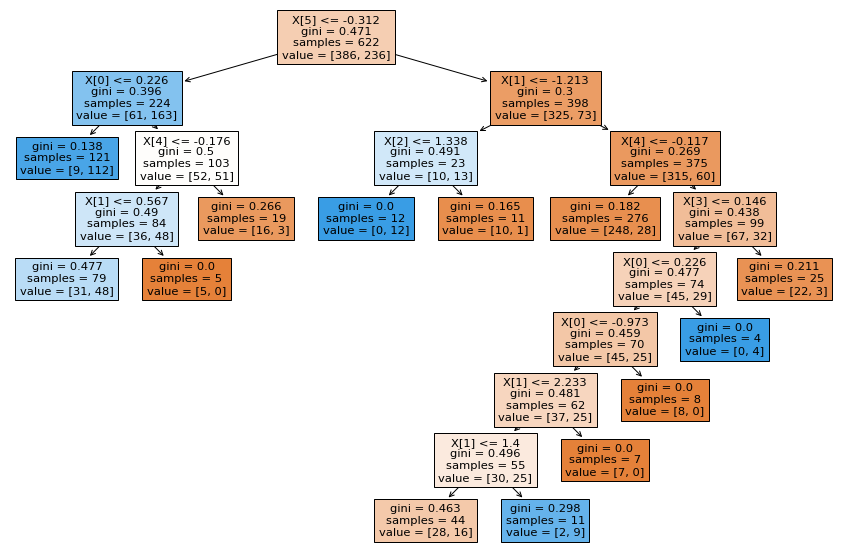

In [72]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf_tree,filled=True)

In [87]:
from sklearn.metrics import roc_auc_score, confusion_matrix
y_pred = clf_tree.predict(X_test)
print("ROC_AUC Score",roc_auc_score(y_pred,y_test))
print("*********************************************")
print("confusion_matrix for pruned tree")
print(confusion_matrix(y_test,y_pred))

ROC_AUC Score 0.8186046511627907
*********************************************
confusion_matrix for pruned tree
[[144  19]
 [ 28  76]]
